#### Project

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from adjustText import adjust_text
import matplotlib.ticker as mticker
import seaborn as sns
#load the data
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
dfj = dataset['train'].to_pandas()
#data clean-up
dfj['job_posted_date']=pd.to_datetime(dfj['job_posted_date'])
dfj['job_skills'] = dfj['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

dfj_DA = dfj[dfj['job_title_short']=='Data Analyst'].copy() # calling specificallly the role from the column for the remainder of the lessons

In [5]:
# Only get data analyst jobs in the US
dfj_DA_US = dfj[(dfj['job_country'] == 'United States') & (dfj['job_title_short'] == 'Data Analyst')]
dfj_DA_US .head()



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."


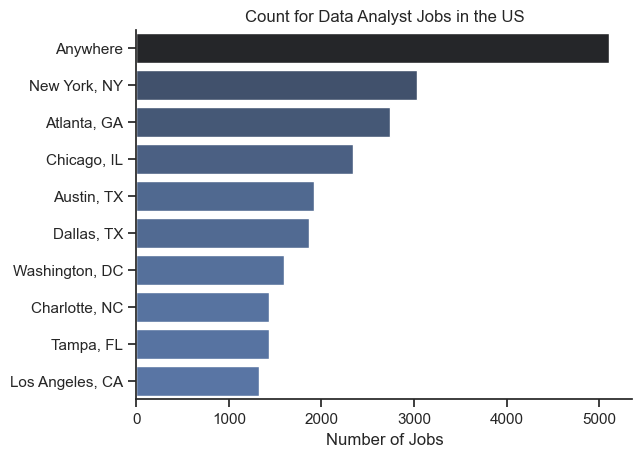

In [14]:
dfj_plot = dfj_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=dfj_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count for Data Analyst Jobs in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

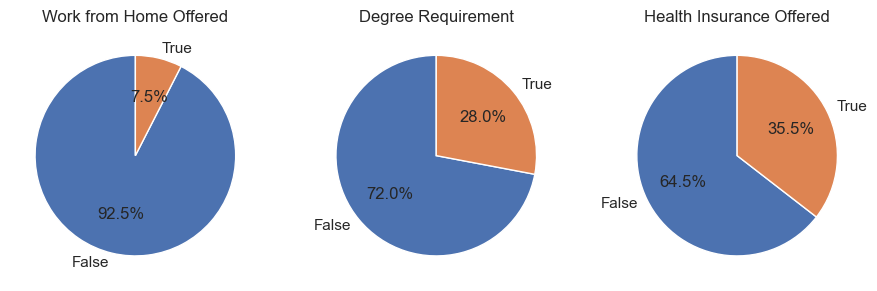

In [17]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(11, 3.5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(dfj_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

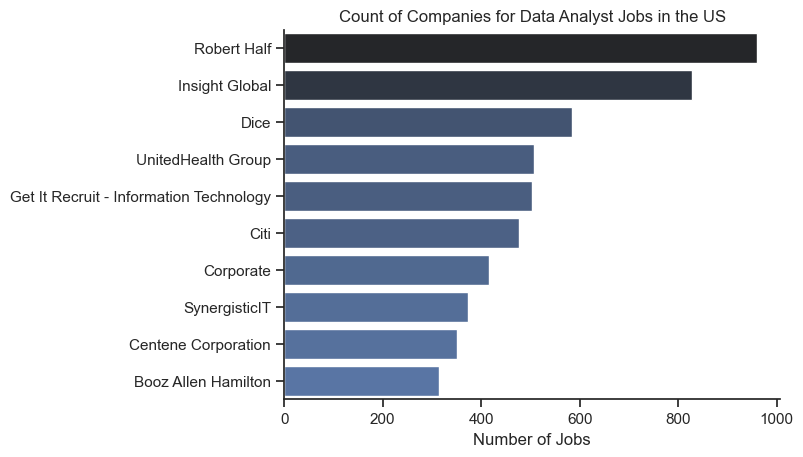

In [18]:
dfj_plot = dfj_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=dfj_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Count of Companies for Data Analyst Jobs in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()